# MNIST - RNA com Keras

Rede Neural Artificial com Keras.

**MNIST** é um conjunto de dados que contém milhares de imagens manuscritas dos dígitos de 0-9. O desafio nesse dataset é, dada uma imagem qualquer, aplicar o label correspondente (classificar corretamente a imagem). O MNIST é tão estudado e utilizado pela comunidade, que atua como benchmark para comparar diferentes algoritmos de reconhecimento de imagens.

In [ ]:
#install Keras
#!pip3 install Keras

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import model_from_json

batch_size = 128
num_classes = 10
epochs = 10

Using TensorFlow backend.


In [2]:
#split data to train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test /=255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [45]:
# dimensões do X_train
print(x_train.shape)

(60000, 784)


In [4]:
#Converter matrizes de classe unidimensionais em matrizes de classe de 10 dimensões
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
print(y_train.shape)

(60000, 10)


In [6]:
print(y_train[:10])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [7]:
#Modelo da arquitetura
#construindo uma pilha linear de camadas com o modelo sequencial
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 

#Dropout - adicionamos o abandono como forma de prevenir o overfitting
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax')) #camada de saída com 10 neurônios

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
filepath = "weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

#check 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min')

callbacks_list = [checkpoint, early_stop]

### Compilação do Modelo

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Treinamento do Modelo

In [10]:
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data=(x_test, y_test), callbacks = callbacks_list
                   )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.2461 - acc: 0.9242 - val_loss: 0.1110 - val_acc: 0.9626

Epoch 00001: val_loss improved from inf to 0.11100, saving model to weights.best.hdf5
Epoch 2/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.1022 - acc: 0.9694 - val_loss: 0.0833 - val_acc: 0.9740

Epoch 00002: val_loss improved from 0.11100 to 0.08335, saving model to weights.best.hdf5
Epoch 3/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0754 - acc: 0.9766 - val_loss: 0.1055 - val_acc: 0.9691

Epoch 00003: val_loss did not improve from 0.08335
Epoch 4/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0600 - acc: 0.9816 - val_loss: 0.0633 - val_acc: 0.9814

Epoch 00004: val_loss improved from 0.08335 to 0.06331, saving model to weights.best.hdf5
Epoch 5/10
60000/60000 [==============================] - 15s 256us/step 

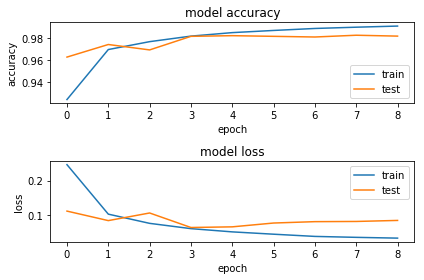

In [12]:
from matplotlib import pyplot as plt

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

### Salvar o Modelo

In [13]:
import os

save_dir = "results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/keras_mnist.h5 


### Avaliação do desempenho Modelo

In [14]:
#score
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0]) #retorna a último valor de perda
print('Test accuracy: ', score[1]) #retorna a última acurácia

Test loss: 0.0838873703728
Test accuracy:  0.9816


In [15]:
#com modelo salvo
mnist_model = load_model('results/keras_mnist.h5')
loss_and_metrics = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss_and_metrics[0]) #retorna a último valor de perda
print('Test accuracy: ', loss_and_metrics[1]) #retorna a última acurácia

Test loss: 0.0838873703728
Test accuracy:  0.9816
